### NSL-KDD **Dataset**

In [ ]:
# Importing libraries

import numpy as np

import pandas as pd
pd.set_option("display.max_columns", None)

In [ ]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
            'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
            'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'intrusion_type']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/NSL_KDD_Combined.csv'

df = pd.read_csv(file_path, names = features, header = None)

df.head()

Mounted at /content/drive


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
print('Number of data points: ',df.shape[0])
print('Number of features: ', df.shape[1])


Number of data points:  148517
Number of features:  42


In [ ]:
output_labels = df['intrusion_type'].unique()
print(f"There are {len(output_labels)} output labels and are: {output_labels}")

There are 40 output labels and are: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


In [ ]:
# Distribution of classes
dist = df['intrusion_type'].value_counts()
for name, count in dist.items():
    print(f"Number of data points in class: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")

Number of data points in class:       normal      is 77054 (51.882%)
Number of data points in class:      neptune      is 45871 (30.886%)
Number of data points in class:       satan       is 4368 (2.941%)
Number of data points in class:      ipsweep      is 3740 (2.518%)
Number of data points in class:       smurf       is 3311 (2.229%)
Number of data points in class:     portsweep     is 3088 (2.079%)
Number of data points in class:        nmap       is 1566 (1.054%)
Number of data points in class:        back       is 1315 (0.885%)
Number of data points in class:    guess_passwd   is 1284 (0.865%)
Number of data points in class:       mscan       is 996 (0.671%)
Number of data points in class:    warezmaster    is 964 (0.649%)
Number of data points in class:      teardrop     is 904 (0.609%)
Number of data points in class:    warezclient    is 890 (0.599%)
Number of data points in class:      apache2      is 737 (0.496%)
Number of data points in class:    processtable   is 685 (0.461

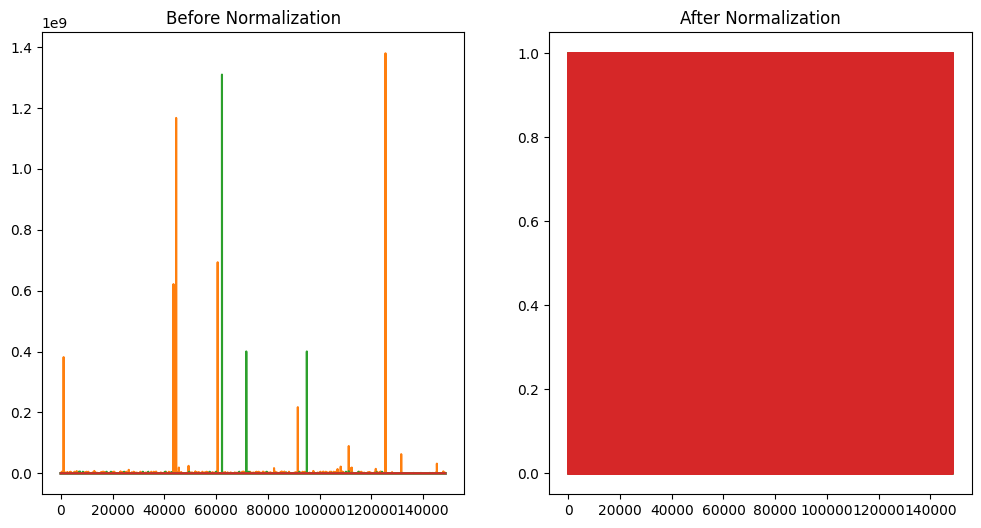

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

numerical_features = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
                      'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                      'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                      'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                      'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                      'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df_original = pd.read_csv(file_path, names=features, header=None)
ax[0].set_title('Before Normalization')
ax[0].plot(df_original[numerical_features])

ax[1].set_title('After Normalization')
ax[1].plot(df[numerical_features])

plt.show()

In [ ]:
# Target is the column to differentiate and store normal and anomaly as 1 and 0
target = []
for label in df['intrusion_type'].values:
    if label == 'normal':
        target.append(1)
    else:
        target.append(0)

In [ ]:
# Preparing dataset

df_dt = df.drop('intrusion_type', axis = 1)
df_dt['target'] = target
df_dt.to_pickle('dt_dataset.pkl')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Load the dataset
df = pd.read_pickle('dt_dataset.pkl')
#shuffle
#df = df.sample(frac=1).reset_index(drop=True)


In [ ]:
from sklearn import preprocessing
import pandas as pd

# Load the training and testing datasets
df_transformed = pd.read_pickle('dt_dataset.pkl')

# Specify the columns to encode
clm = ['protocol_type', 'service', 'flag']

# Create a label encoder for each column
label_encoders = {col: preprocessing.LabelEncoder() for col in clm}

# Fit the label encoders on the training data and transform the data
for col in clm:
    # Fit the label encoder on the training data
    label_encoders[col].fit(df_transformed[col])

    # Transform the data
    df_transformed[col] = label_encoders[col].transform(df_transformed[col])

# Print the mappings for each column
for col in clm:
    print(f'Mappings for {col}:')
    for idx, class_ in enumerate(label_encoders[col].classes_):
        print(f'  {class_} - {idx}')
    print('\n')



Mappings for protocol_type:
  icmp - 0
  tcp - 1
  udp - 2


Mappings for service:
  IRC - 0
  X11 - 1
  Z39_50 - 2
  aol - 3
  auth - 4
  bgp - 5
  courier - 6
  csnet_ns - 7
  ctf - 8
  daytime - 9
  discard - 10
  domain - 11
  domain_u - 12
  echo - 13
  eco_i - 14
  ecr_i - 15
  efs - 16
  exec - 17
  finger - 18
  ftp - 19
  ftp_data - 20
  gopher - 21
  harvest - 22
  hostnames - 23
  http - 24
  http_2784 - 25
  http_443 - 26
  http_8001 - 27
  imap4 - 28
  iso_tsap - 29
  klogin - 30
  kshell - 31
  ldap - 32
  link - 33
  login - 34
  mtp - 35
  name - 36
  netbios_dgm - 37
  netbios_ns - 38
  netbios_ssn - 39
  netstat - 40
  nnsp - 41
  nntp - 42
  ntp_u - 43
  other - 44
  pm_dump - 45
  pop_2 - 46
  pop_3 - 47
  printer - 48
  private - 49
  red_i - 50
  remote_job - 51
  rje - 52
  shell - 53
  smtp - 54
  sql_net - 55
  ssh - 56
  sunrpc - 57
  supdup - 58
  systat - 59
  telnet - 60
  tftp_u - 61
  tim_i - 62
  time - 63
  urh_i - 64
  urp_i - 65
  uucp - 66
  uucp_pat

In [ ]:
df_transformed.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df_transformed, test_size=0.2, shuffle=True, random_state=42)

# Separate the features and target for training and testing sets
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Optional: Print shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (118813, 41)
y_train shape: (118813,)
X_test shape: (29704, 41)
y_test shape: (29704,)


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Start time for training
start_train_time = time.time()

# Create the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# End time for training
end_train_time = time.time()
RFtraining_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# End time for testing
end_test_time = time.time()
RFtesting_time = end_test_time - start_test_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
RF_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {RF_accuracy}')

# Calculate precision
RF_precision = precision_score(y_test, y_pred)
print(f'Precision: {RF_precision:.2f}')

# Calculate recall
RF_recall = recall_score(y_test, y_pred)
print(f'Recall: {RF_recall:.2f}')

# Calculate F1-Score
RF_f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {RF_f1:.2f}')

# Generate the confusion matrix
RF_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(RF_conf_matrix)

# Generate a classification report
RF_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(RF_class_report)

# Get hyperparameters used
RF_hyperparameters = rf.get_params()
print('Hyperparameters Used:')
print(RF_hyperparameters)

# Print training and testing time
print(f'Training Time: {RFtraining_time:.2f} seconds')
print(f'Testing Time: {RFtesting_time:.2f} seconds')


Accuracy: 99.57%
Precision: 0.99
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[14174    80]
 [   49 15401]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14254
           1       0.99      1.00      1.00     15450

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704

Hyperparameters Used:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Training Time: 14.21 seconds
Testing Time: 0.45 seconds


In [ ]:
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Start time for training
start_train_time = time.time()

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm_linear = LinearSVC(dual='auto', max_iter=10000)
svm_linear.fit(X_train_scaled, y_train)

# End time for training
end_train_time = time.time()
SVMtraining_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Predict on the test set
y_pred = svm_linear.predict(X_test_scaled)

# End time for testing
end_test_time = time.time()
SVMtesting_time = end_test_time - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
SVM_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {SVM_accuracy}')

# Calculate precision
SVM_precision = precision_score(y_test, y_pred)
print(f'Precision: {SVM_precision:.2f}')

# Calculate recall
SVM_recall = recall_score(y_test, y_pred)
print(f'Recall: {SVM_recall:.2f}')

# Calculate F1-Score
SVM_f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {SVM_f1:.2f}')

# Generate the confusion matrix
SVM_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(SVM_conf_matrix)

# Generate a classification report
SVM_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(SVM_class_report)

# Get hyperparameters used
SVM_hyperparameters = svm_linear.get_params()
print('Hyperparameters Used:')
print(SVM_hyperparameters)

# Print training and testing time
print(f'Training Time: {SVMtraining_time:.2f} seconds')
print(f'Testing Time: {SVMtesting_time:.2f} seconds')


Accuracy: 93.54%
Precision: 0.92
Recall: 0.95
F1-Score: 0.94
Confusion Matrix:
[[13048  1206]
 [  713 14737]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14254
           1       0.92      0.95      0.94     15450

    accuracy                           0.94     29704
   macro avg       0.94      0.93      0.94     29704
weighted avg       0.94      0.94      0.94     29704

Hyperparameters Used:
{'C': 1.0, 'class_weight': None, 'dual': 'auto', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Training Time: 77.96 seconds
Testing Time: 0.01 seconds


In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Start time for training
start_train_time = time.time()


# Initialize and train the Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# End time for training
end_train_time = time.time()
DTtraining_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Predict on the test set
y_pred = tree.predict(X_test)

# End time for testing
end_test_time = time.time()
DTtesting_time = end_test_time - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
DT_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {DT_accuracy}')

# Calculate precision
DT_precision = precision_score(y_test, y_pred)
print(f'Precision: {DT_precision:.2f}')

# Calculate recall
DT_recall = recall_score(y_test, y_pred)
print(f'Recall: {DT_recall:.2f}')

# Calculate F1-Score
DT_f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {DT_f1:.2f}')

# Generate the confusion matrix
DT_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(DT_conf_matrix)

# Generate a classification report
DT_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(DT_class_report)

# Get hyperparameters used
DT_hyperparameters = tree.get_params()
print('Hyperparameters Used:')
print(DT_hyperparameters)

# Print training and testing time
print(f'Training Time: {DTtraining_time:.2f} seconds')
print(f'Testing Time: {DTtesting_time:.2f} seconds')


Accuracy: 99.44%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
Confusion Matrix:
[[14176    78]
 [   88 15362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14254
           1       0.99      0.99      0.99     15450

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704

Hyperparameters Used:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Training Time: 1.21 seconds
Testing Time: 0.01 seconds


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Start time for training
start_train_time = time.time()

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# End time for training
end_train_time = time.time()
KNNtraining_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# End time for testing
end_test_time = time.time()
KNNtesting_time = end_test_time - start_test_time


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
KNN_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {KNN_accuracy}')

# Calculate precision
KNN_precision = precision_score(y_test, y_pred)
print(f'Precision: {KNN_precision:.2f}')

# Calculate recall
KNN_recall = recall_score(y_test, y_pred)
print(f'Recall: {KNN_recall:.2f}')

# Calculate F1-Score
KNN_f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {KNN_f1:.2f}')

# Generate the confusion matrix
KNN_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(KNN_conf_matrix)

# Generate a classification report
KNN_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(KNN_class_report)

# Get hyperparameters used
KNN_hyperparameters = knn.get_params()
print('Hyperparameters Used:')
print(KNN_hyperparameters)

# Print training and testing time
print(f'Training Time: {KNNtraining_time:.2f} seconds')
print(f'Testing Time: {KNNtesting_time:.2f} seconds')

Accuracy: 99.02%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
Confusion Matrix:
[[14114   140]
 [  152 15298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14254
           1       0.99      0.99      0.99     15450

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704

Hyperparameters Used:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Training Time: 0.16 seconds
Testing Time: 31.97 seconds


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Start time for training
start_train_time = time.time()

# Feature scaling (optional for Naive Bayes, but can be useful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# End time for training
end_train_time = time.time()
NBtraining_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Predict on the test set
y_pred = nb.predict(X_test_scaled)

# End time for testing
end_test_time = time.time()
NBtesting_time = end_test_time - start_test_time


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
NB_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {NB_accuracy}')

# Calculate precision
NB_precision = precision_score(y_test, y_pred)
print(f'Precision: {NB_precision:.2f}')

# Calculate recall
NB_recall = recall_score(y_test, y_pred)
print(f'Recall: {NB_recall:.2f}')

# Calculate F1-Score
NB_f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {NB_f1:.2f}')

# Generate the confusion matrix
NB_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(NB_conf_matrix)

# Generate a classification report
NB_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(NB_class_report)

# Get hyperparameters used
NB_hyperparameters = nb.get_params()
print('Hyperparameters Used:')
print(NB_hyperparameters)

# Print training and testing time
print(f'Training Time: {NBtraining_time:.2f} seconds')
print(f'Testing Time: {NBtesting_time:.2f} seconds')


Accuracy: 87.76%
Precision: 0.88
Recall: 0.89
F1-Score: 0.88
Confusion Matrix:
[[12370  1884]
 [ 1752 13698]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     14254
           1       0.88      0.89      0.88     15450

    accuracy                           0.88     29704
   macro avg       0.88      0.88      0.88     29704
weighted avg       0.88      0.88      0.88     29704

Hyperparameters Used:
{'priors': None, 'var_smoothing': 1e-09}
Training Time: 0.23 seconds
Testing Time: 0.02 seconds


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time

# Start time for training
start_train_time = time.time()

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# End time for training
end_train_time = time.time()
XGB_training_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# End time for testing
end_test_time = time.time()
XGB_testing_time = end_test_time - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
XGB_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {XGB_accuracy}')

# Calculate precision
XGB_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {XGB_precision:.2f}')

# Calculate recall
XGB_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {XGB_recall:.2f}')

# Calculate F1-Score
XGB_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {XGB_f1:.2f}')

# Generate the confusion matrix
XGB_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(XGB_conf_matrix)

# Generate a classification report
XGB_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(XGB_class_report)

# Get hyperparameters used
XGB_hyperparameters = xgb_model.get_params()
print('Hyperparameters Used:')
print(XGB_hyperparameters)

# Print training and testing time
print(f'Training Time: {XGB_training_time:.2f} seconds')
print(f'Testing Time: {XGB_testing_time:.2f} seconds')


Accuracy: 98.68%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
Confusion Matrix:
[[14010   244]
 [  147 15303]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14254
           1       0.98      0.99      0.99     15450

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704

Hyperparameters Used:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max

In [ ]:
import pandas as pd

def print_confusion_matrix_table(cm):

    # Extract TP, TN, FP, FN
    TP, FP, FN, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

    # Creating a DataFrame to display as a table
    data = {
        "Positive": [TP, FP],
        "Negative": [TN, FN]
    }

    confusion_matrix_df = pd.DataFrame(data, index=["True", "False"])

    # Displaying the table
    print(confusion_matrix_df)




In [ ]:
import pandas as pd

# Assuming you have the accuracy values for different models
comparison = {
    'Model': ['Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors', 'XG-Boost'],
    'Accuracy': [RF_accuracy, SVM_accuracy, DT_accuracy, NB_accuracy, KNN_accuracy, XGB_accuracy],
    'Precision': [RF_precision, SVM_precision, DT_precision, NB_precision, KNN_precision, XGB_precision],
    'Recall': [RF_recall, SVM_recall, DT_recall, NB_recall, KNN_recall, XGB_recall],
    'F1-Score': [RF_f1, SVM_f1, DT_f1, NB_f1, KNN_f1, XGB_f1],
    'Train Time': [RFtraining_time, SVMtraining_time, DTtraining_time, NBtraining_time, KNNtraining_time, XGB_training_time],
    'Test Time': [RFtesting_time, SVMtesting_time, DTtesting_time, NBtesting_time, KNNtesting_time, XGB_testing_time]
}

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(comparison)




In [ ]:
comparison_df.head(6)

,Model,Accuracy,Precision,Recall,F1-Score,Train Time,Test Time
0,Random Forest,99.57%,0.994832,0.996828,0.995829,14.884996,1.786136
1,SVM,93.54%,0.924356,0.953851,0.938872,123.622632,0.003769
2,Decision Tree,99.44%,0.994948,0.994304,0.994626,1.046169,0.009844
3,Naive Bayes,87.76%,0.879091,0.886602,0.882831,0.246608,0.013274
4,K-Nearest Neighbors,99.02%,0.990931,0.990162,0.990546,0.267148,28.462209
5,XG-Boost,98.68%,0.986854,0.986837,0.986835,2.110078,0.045460


In [ ]:
print('Random Forest')
print_confusion_matrix_table(RF_conf_matrix)
print()
print('SVM')
print_confusion_matrix_table(SVM_conf_matrix)
print()
print('Decision Tree')
print_confusion_matrix_table(DT_conf_matrix)
print()
print('Naive Bayes')
print_confusion_matrix_table(NB_conf_matrix)
print()
print('K-Nearest Neighbors')
print_confusion_matrix_table(KNN_conf_matrix)
print()
print('XG-Boost')
print_confusion_matrix_table(XGB_conf_matrix)

Random Forest
       Positive  Negative
True      14174     15401
False        80        49

SVM
       Positive  Negative
True      13048     14737
False      1206       713

Decision Tree
       Positive  Negative
True      14176     15362
False        78        88

Naive Bayes
       Positive  Negative
True      12370     13698
False      1884      1752

K-Nearest Neighbors
       Positive  Negative
True      14114     15298
False       140       152

XG-Boost
       Positive  Negative
True      14010     15303
False       244       147


In [ ]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                      0.542282
dst_bytes                      0.436878
service                        0.431395
flag                           0.336222
same_srv_rate                  0.324791
diff_srv_rate                  0.321380
dst_host_srv_count             0.303251
dst_host_same_srv_rate         0.280842
logged_in                      0.259330
dst_host_diff_srv_rate         0.258875
dst_host_serror_rate           0.239725
count                          0.236083
serror_rate                    0.234016
dst_host_srv_serror_rate       0.232296
srv_serror_rate                0.221390
dst_host_srv_diff_host_rate    0.171835
dst_host_count                 0.138993
dst_host_same_src_port_rate    0.129143
srv_diff_host_rate             0.098057
dst_host_srv_rerror_rate       0.066206
rerror_rate                    0.056296
dst_host_rerror_rate           0.054647
srv_rerror_rate                0.050503
protocol_type                  0.049453
srv_count                      0.045998


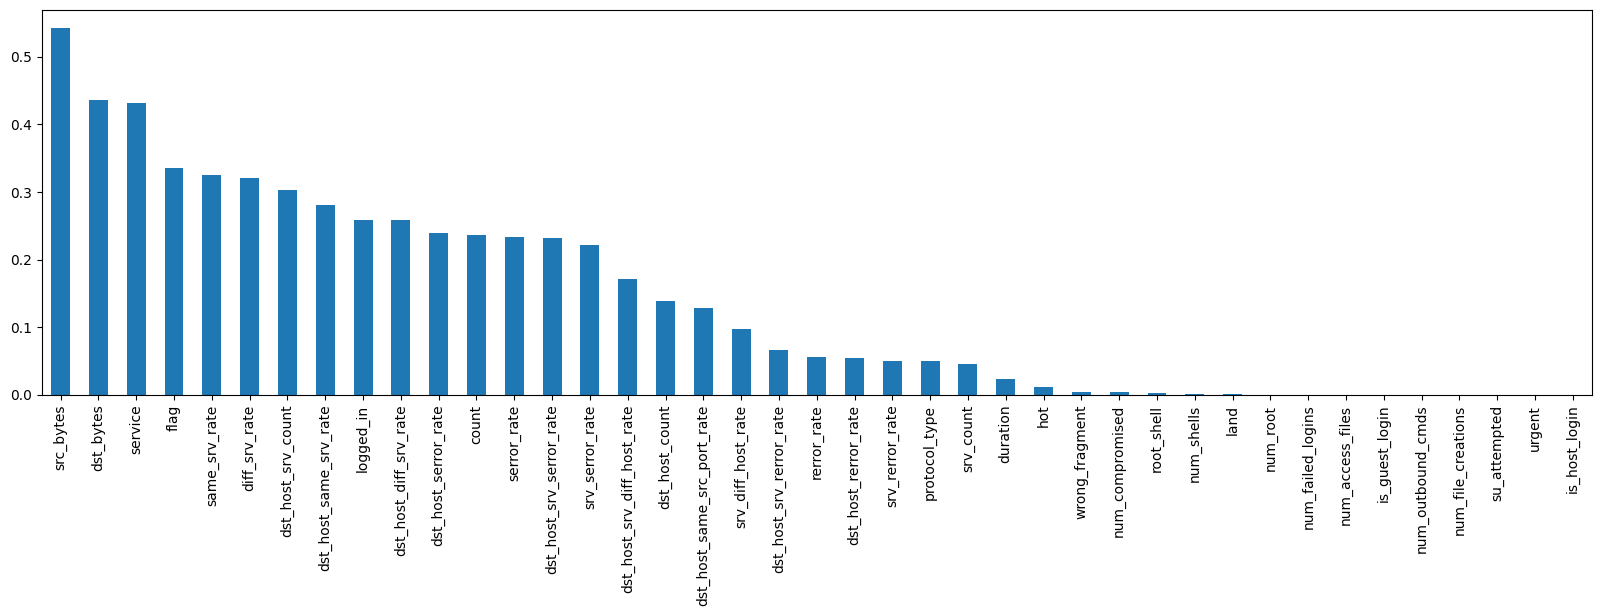

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [ ]:
#will be using 30 features
col = [
    "src_bytes",
    "dst_bytes",
    "service",
    "flag",
    "same_srv_rate",
    "diff_srv_rate",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "logged_in",
    "dst_host_diff_srv_rate",
    "dst_host_serror_rate",
    "serror_rate",
    "count",
    "dst_host_srv_serror_rate",
    "srv_serror_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_count",
    "dst_host_same_src_port_rate",
    "srv_diff_host_rate",
    "dst_host_srv_rerror_rate",
    "rerror_rate",
    "dst_host_rerror_rate",
    "protocol_type",
    "srv_rerror_rate",
    "srv_count",
    "duration",
    "hot",
    "wrong_fragment",
    "num_compromised",
    "root_shell"
]



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df_transformed, test_size=0.2, shuffle=True, random_state=42)

# Separate the features and target for training and testing sets
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']



In [ ]:

X_train = X_train[col]
X_test = X_test[col]
X_train.head()


,src_bytes,dst_bytes,service,flag,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,dst_host_diff_srv_rate,dst_host_serror_rate,serror_rate,count,dst_host_srv_serror_rate,srv_serror_rate,dst_host_srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,srv_diff_host_rate,dst_host_srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type,srv_rerror_rate,srv_count,duration,hot,wrong_fragment,num_compromised,root_shell
21934,1247,332,54,9,1.00,0.00,166,0.63,1,0.15,0.0,0.0,1,0.0,0.0,0.02,41,0.02,0.0,0.0,0.0,0.0,1,0.0,1,0,0,0,0,0
128003,356,4241,24,9,1.00,0.00,255,1.00,1,0.00,0.0,0.0,1,0.0,0.0,0.02,28,0.04,0.0,0.0,0.0,0.0,1,0.0,1,0,0,0,0,0
10407,921,330,54,9,1.00,0.00,245,0.96,1,0.01,0.0,0.0,1,0.0,0.0,0.01,208,0.00,0.0,0.0,0.0,0.0,1,0.0,1,0,0,0,0,0
59704,0,0,5,5,0.02,0.06,17,0.07,0,0.07,1.0,1.0,219,1.0,1.0,0.00,255,0.00,0.0,0.0,0.0,0.0,1,0.0,4,0,0,0,0,0
59613,0,0,40,5,0.01,0.07,2,0.01,0,0.08,1.0,1.0,231,1.0,1.0,0.00,255,0.00,0.0,0.0,0.0,0.0,1,0.0,2,0,0,0,0,0


In [ ]:
# Optional: Print shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (118813, 30)
y_train shape: (118813,)
X_test shape: (29704, 30)
y_test shape: (29704,)


In [ ]:
#random forest
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

start_train_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_train_time = time.time()
RFtraining_time = end_train_time - start_train_time
start_test_time = time.time()
y_pred = rf.predict(X_test)
end_test_time = time.time()
RFtesting_time = end_test_time - start_test_time
accuracy = accuracy_score(y_test, y_pred)
RF_accuracy = f'{accuracy * 100:.2f}%'
RF_precision = precision_score(y_test, y_pred)
RF_recall = recall_score(y_test, y_pred)
RF_f1 = f1_score(y_test, y_pred)
RF_conf_matrix = confusion_matrix(y_test, y_pred)
RF_class_report = classification_report(y_test, y_pred)
RF_hyperparameters = rf.get_params()


In [ ]:
#svm
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
start_train_time = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_linear = LinearSVC(dual='auto', max_iter=10000)
svm_linear.fit(X_train_scaled, y_train)
end_train_time = time.time()
SVMtraining_time = end_train_time - start_train_time
start_test_time = time.time()
y_pred = svm_linear.predict(X_test_scaled)
end_test_time = time.time()
SVMtesting_time = end_test_time - start_test_time
accuracy = accuracy_score(y_test, y_pred)
SVM_accuracy = f'{accuracy * 100:.2f}%'
SVM_precision = precision_score(y_test, y_pred)
SVM_recall = recall_score(y_test, y_pred)
SVM_f1 = f1_score(y_test, y_pred)
SVM_conf_matrix = confusion_matrix(y_test, y_pred)
SVM_class_report = classification_report(y_test, y_pred)
SVM_hyperparameters = svm_linear.get_params()


In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
start_train_time = time.time()
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
end_train_time = time.time()
DTtraining_time = end_train_time - start_train_time
start_test_time = time.time()
y_pred = tree.predict(X_test)
end_test_time = time.time()
DTtesting_time = end_test_time - start_test_time
accuracy = accuracy_score(y_test, y_pred)
DT_accuracy = f'{accuracy * 100:.2f}%'
DT_precision = precision_score(y_test, y_pred)
DT_recall = recall_score(y_test, y_pred)
DT_f1 = f1_score(y_test, y_pred)
DT_conf_matrix = confusion_matrix(y_test, y_pred)
DT_class_report = classification_report(y_test, y_pred)
DT_hyperparameters = svm_linear.get_params()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

start_train_time = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
end_train_time = time.time()
KNNtraining_time = end_train_time - start_train_time
start_test_time = time.time()
y_pred = knn.predict(X_test_scaled)
end_test_time = time.time()
KNNtesting_time = end_test_time - start_test_time
accuracy = accuracy_score(y_test, y_pred)
KNN_precision = precision_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_f1 = f1_score(y_test, y_pred)
KNN_conf_matrix = confusion_matrix(y_test, y_pred)
KNN_class_report = classification_report(y_test, y_pred)
KNN_hyperparameters = knn.get_params()

In [ ]:
#nb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
start_train_time = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
end_train_time = time.time()
NBtraining_time = end_train_time - start_train_time
start_test_time = time.time()
y_pred = nb.predict(X_test_scaled)
end_test_time = time.time()
NBtesting_time = end_test_time - start_test_time
accuracy = accuracy_score(y_test, y_pred)
NB_accuracy = f'{accuracy * 100:.2f}%'
NB_precision = precision_score(y_test, y_pred)
NB_recall = recall_score(y_test, y_pred)
NB_f1 = f1_score(y_test, y_pred)
NB_conf_matrix = confusion_matrix(y_test, y_pred)
NB_class_report = classification_report(y_test, y_pred)
NB_hyperparameters = nb.get_params()


In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
start_train_time = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
end_train_time = time.time()
XGB_training_time = end_train_time - start_train_time
start_test_time = time.time()
y_pred = xgb_model.predict(X_test_scaled)
end_test_time = time.time()
XGB_testing_time = end_test_time - start_test_time
accuracy = accuracy_score(y_test, y_pred)
XGB_accuracy = f'{accuracy * 100:.2f}%'
XGB_precision = precision_score(y_test, y_pred, average='weighted')
XGB_recall = recall_score(y_test, y_pred, average='weighted')
XGB_f1 = f1_score(y_test, y_pred, average='weighted')
XGB_conf_matrix = confusion_matrix(y_test, y_pred)
XGB_class_report = classification_report(y_test, y_pred)

In [ ]:
import pandas as pd

# Assuming you have the accuracy values for different models
comparison = {
    'Model': ['Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors', 'XG-Boost'],
    'Accuracy': [RF_accuracy, SVM_accuracy, DT_accuracy, NB_accuracy, KNN_accuracy, XGB_accuracy],
    'Precision': [RF_precision, SVM_precision, DT_precision, NB_precision, KNN_precision, XGB_precision],
    'Recall': [RF_recall, SVM_recall, DT_recall, NB_recall, KNN_recall, XGB_recall],
    'F1-Score': [RF_f1, SVM_f1, DT_f1, NB_f1, KNN_f1, XGB_f1],
    'Train Time': [RFtraining_time, SVMtraining_time, DTtraining_time, NBtraining_time, KNNtraining_time, XGB_training_time],
    'Test Time': [RFtesting_time, SVMtesting_time, DTtesting_time, NBtesting_time, KNNtesting_time, XGB_testing_time]
}

# Convert the dictionary to a DataFrame
comparison_df2 = pd.DataFrame(comparison)




In [ ]:
comparison_df.head(6)

,Model,Accuracy,Precision,Recall,F1-Score,Train Time,Test Time
0,Random Forest,99.57%,0.994832,0.996828,0.995829,14.884996,1.786136
1,SVM,93.54%,0.924356,0.953851,0.938872,123.622632,0.003769
2,Decision Tree,99.44%,0.994948,0.994304,0.994626,1.046169,0.009844
3,Naive Bayes,87.76%,0.879091,0.886602,0.882831,0.246608,0.013274
4,K-Nearest Neighbors,99.02%,0.990931,0.990162,0.990546,0.267148,28.462209
5,XG-Boost,98.68%,0.986854,0.986837,0.986835,2.110078,0.045460


In [ ]:
comparison_df2.head(6)

,Model,Accuracy,Precision,Recall,F1-Score,Train Time,Test Time
0,Random Forest,99.57%,0.994769,0.996958,0.995862,16.678887,0.397358
1,SVM,93.43%,0.921501,0.955081,0.937991,3.379206,0.002826
2,Decision Tree,99.43%,0.994819,0.994304,0.994562,0.979223,0.013459
3,Naive Bayes,87.12%,0.856084,0.904401,0.879580,0.140259,0.009508
4,K-Nearest Neighbors,99.02%,0.990481,0.990032,0.990257,0.107406,25.122777
5,XG-Boost,98.72%,0.987227,0.987207,0.987205,3.078328,0.055827


In [ ]:
print('Random Forest')
print_confusion_matrix_table(RF_conf_matrix)
print()
print('SVM')
print_confusion_matrix_table(SVM_conf_matrix)
print()
print('Decision Tree')
print_confusion_matrix_table(DT_conf_matrix)
print()
print('Naive Bayes')
print_confusion_matrix_table(NB_conf_matrix)
print()
print('K-Nearest Neighbors')
print_confusion_matrix_table(KNN_conf_matrix)
print()
print('XG-Boost')
print_confusion_matrix_table(XGB_conf_matrix)

Random Forest
       Positive  Negative
True      14169     15405
False        85        45

SVM
       Positive  Negative
True      12932     14769
False      1322       681

Decision Tree
       Positive  Negative
True      14168     15351
False        86        99

Naive Bayes
       Positive  Negative
True      11841     13949
False      2413      1501

K-Nearest Neighbors
       Positive  Negative
True      14114     15290
False       140       160

XG-Boost
       Positive  Negative
True      14013     15298
False       241       152


### **For Wireshark Testing**

In [ ]:
col = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df_transformed, test_size=0.2, shuffle=True, random_state=42)

# Separate the features and target for training and testing sets
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']


X_train = X_train[col]
X_test = X_test[col]
X_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
21934,0,1,54,9,1247,332,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1.00,0.00,0.0,41,166,0.63,0.15,0.02,0.02,0.0,0.0,0.0,0.0
128003,0,1,24,9,356,4241,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1.00,0.00,0.0,28,255,1.00,0.00,0.04,0.02,0.0,0.0,0.0,0.0
10407,0,1,54,9,921,330,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1.00,0.00,0.0,208,245,0.96,0.01,0.00,0.01,0.0,0.0,0.0,0.0
59704,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,4,0.02,0.06,0.0,255,17,0.07,0.07,0.00,0.00,1.0,1.0,0.0,0.0
59613,0,1,40,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,231,2,0.01,0.07,0.0,255,2,0.01,0.08,0.00,0.00,1.0,1.0,0.0,0.0


In [ ]:
# Optional: Print shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (118813, 36)
y_train shape: (118813,)
X_test shape: (29704, 36)
y_test shape: (29704,)


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Start time for training
start_train_time = time.time()

# Create the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# End time for training
end_train_time = time.time()
RFtraining_time = end_train_time - start_train_time

# Start time for testing
start_test_time = time.time()

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# End time for testing
end_test_time = time.time()
RFtesting_time = end_test_time - start_test_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
RF_accuracy = f'{accuracy * 100:.2f}%'
print(f'Accuracy: {RF_accuracy}')

# Calculate precision
RF_precision = precision_score(y_test, y_pred)
print(f'Precision: {RF_precision:.2f}')

# Calculate recall
RF_recall = recall_score(y_test, y_pred)
print(f'Recall: {RF_recall:.2f}')

# Calculate F1-Score
RF_f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {RF_f1:.2f}')

# Generate the confusion matrix
RF_conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(RF_conf_matrix)

# Generate a classification report
RF_class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(RF_class_report)

# Get hyperparameters used
RF_hyperparameters = rf.get_params()
print('Hyperparameters Used:')
print(RF_hyperparameters)

# Print training and testing time
print(f'Training Time: {RFtraining_time:.2f} seconds')
print(f'Testing Time: {RFtesting_time:.2f} seconds')


Accuracy: 99.57%
Precision: 0.99
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[14174    80]
 [   48 15402]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14254
           1       0.99      1.00      1.00     15450

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704

Hyperparameters Used:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Training Time: 14.74 seconds
Testing Time: 0.35 seconds


In [ ]:
import pandas as pd

# Assuming df_transformed is your preprocessed dataset with encoded categorical features
# Extract the first row of the dataset (as an example)
single_connection_df = df_transformed.iloc[0:1, :-1]  # Exclude the target column

# Make the prediction
prediction = rf.predict(single_connection_df[col])

# Get the predicted class label
predicted_label = prediction[0]

# Map the predicted label to "normal" or "abnormal"
result = "normal" if predicted_label == 1 else "abnormal"

print(f'Predicted class for the single connection: {result}')


Predicted class for the single connection: normal


In [ ]:
import pandas as pd

# Example single connection data (values only)
single_connection_data = [
    5, 1, 28, 9, 179052, 16908, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 6, 6, 0.06, 0.94, 0, 6, 6, 0.06, 0.94, 0.06, 0, 0, 0, 0, 0
]

# Convert the list to a DataFrame (single row)
single_connection_df = pd.DataFrame([single_connection_data], columns=col)

# Make the prediction
prediction = rf.predict(single_connection_df)

# Get the predicted class label
predicted_label = prediction[0]

predicted_label = prediction[0]
if predicted_label == 1:
    result = "normal"
else:
    result = "abnormal"

print(f'Predicted class for the single connection: {result}')


Predicted class for the single connection: normal


In [ ]:
import joblib

# Save the trained model to a file
joblib_file = "random_forest_model.pkl"
joblib.dump(rf, joblib_file)


['random_forest_model.pkl']

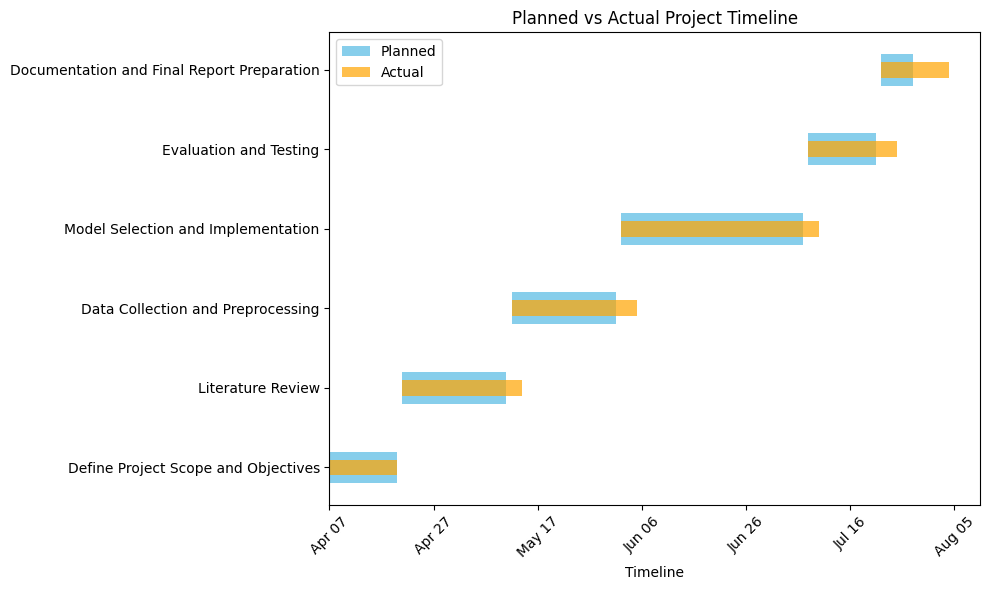

In [ ]:
# Re-plotting the Gantt chart to display as an image
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Task names and dates for planned and actual timelines
tasks = ["Define Project Scope and Objectives", "Literature Review", "Data Collection and Preprocessing",
         "Model Selection and Implementation", "Evaluation and Testing", "Documentation and Final Report Preparation"]

planned_start_dates = [datetime.date(2024, 4, 7), datetime.date(2024, 4, 21), datetime.date(2024, 5, 12),
                       datetime.date(2024, 6, 2), datetime.date(2024, 7, 8), datetime.date(2024, 7, 22)]
planned_end_dates = [datetime.date(2024, 4, 20), datetime.date(2024, 5, 11), datetime.date(2024, 6, 1),
                     datetime.date(2024, 7, 7), datetime.date(2024, 7, 21), datetime.date(2024, 7, 28)]

actual_start_dates = [datetime.date(2024, 4, 7), datetime.date(2024, 4, 21), datetime.date(2024, 5, 12),
                      datetime.date(2024, 6, 2), datetime.date(2024, 7, 8), datetime.date(2024, 7, 22)]
actual_end_dates = [datetime.date(2024, 4, 20), datetime.date(2024, 5, 14), datetime.date(2024, 6, 5),
                    datetime.date(2024, 7, 10), datetime.date(2024, 7, 25), datetime.date(2024, 8, 4)]

# Convert dates to Matplotlib date format
planned_start = mdates.date2num(planned_start_dates)
planned_end = mdates.date2num(planned_end_dates)
actual_start = mdates.date2num(actual_start_dates)
actual_end = mdates.date2num(actual_end_dates)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot planned timeline
ax.barh(tasks, planned_end - planned_start, left=planned_start, height=0.4, color='skyblue', label='Planned')

# Plot actual timeline
ax.barh(tasks, actual_end - actual_start, left=actual_start, height=0.2, color='orange', label='Actual', alpha=0.7)

# Set labels and format
ax.set_xlabel('Timeline')
ax.set_title('Planned vs Actual Project Timeline')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format x-axis as dates

# Rotate date labels
plt.xticks(rotation=45)
plt.legend()

# Show the figure
plt.tight_layout()
plt.show()
